<a href="https://colab.research.google.com/github/ronaldodeschain/rd_colab/blob/main/Introdu%C3%A7%C3%A3o_a_Machine_Learning_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [5]:
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
dados = dados.rename(columns = a_renomear)


In [6]:
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [7]:
troca = {
    0 : 1,
    1 : 0
}
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


<Axes: xlabel='horas_esperadas', ylabel='preco'>

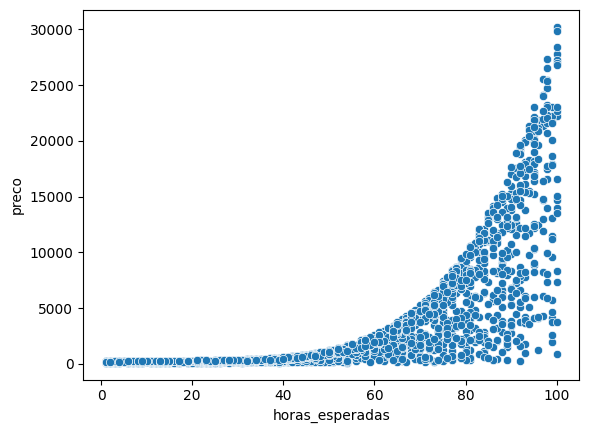

In [8]:
import seaborn as sns
#criando um grafico em cima dos dados estilo scatter
sns.scatterplot(x="horas_esperadas",y="preco", data=dados)

<Axes: xlabel='horas_esperadas', ylabel='preco'>

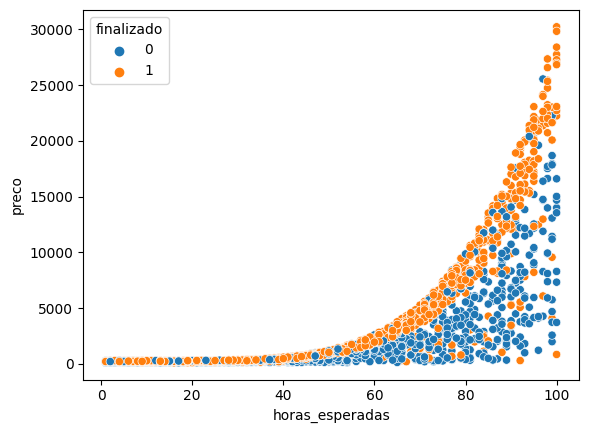

In [9]:
sns.scatterplot(x="horas_esperadas",y="preco",hue="finalizado", data=dados)
#hue colore com base em um parametro. No caso finalizado para saber pela cor se sim ou não

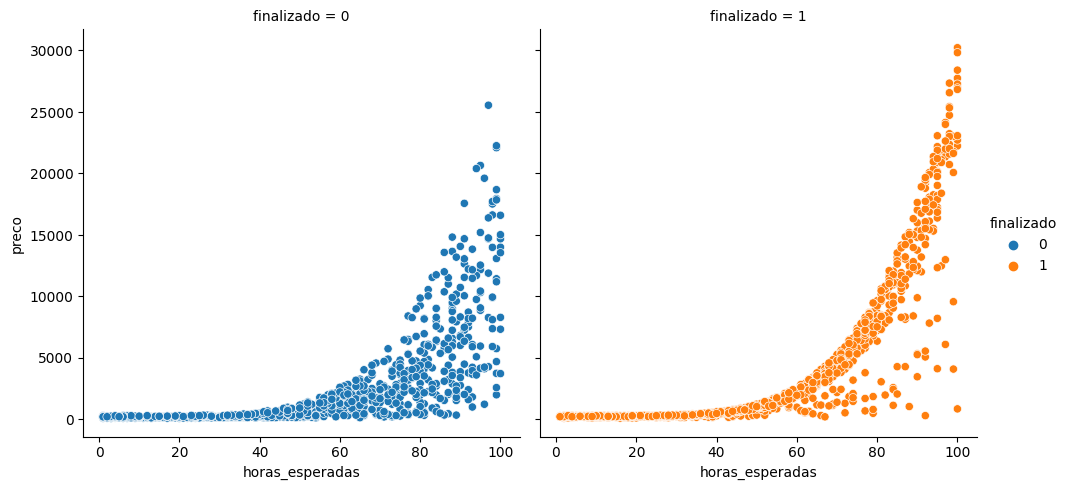

In [12]:
sns.relplot(x="horas_esperadas",y="preco",hue="finalizado",col="finalizado", data=dados)
#aqui separa em colunas para mostrar se foi finalizado ou não

In [13]:
x = dados[['horas_esperadas','preco']]
y = dados['finalizado']

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

treino_x,teste_x,treino_y,teste_y = train_test_split(x,y,
                                                     random_state = SEED,
                                                     test_size = 0.25,
                                                     stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x),len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict (teste_x)

acuracia = accuracy_score(teste_y,previsoes) *100
print("A acurácia foi de %.2f%%" %acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi de 54.07%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [45]:
import numpy as np
previsoes_de_base = np.ones(540)
acuracia = accuracy_score(teste_y,previsoes_de_base) *100
print("A acurácia do algoritmo de baseline foi de %.2f%%" %acuracia)


A acurácia do algoritmo de baseline foi de 52.59%


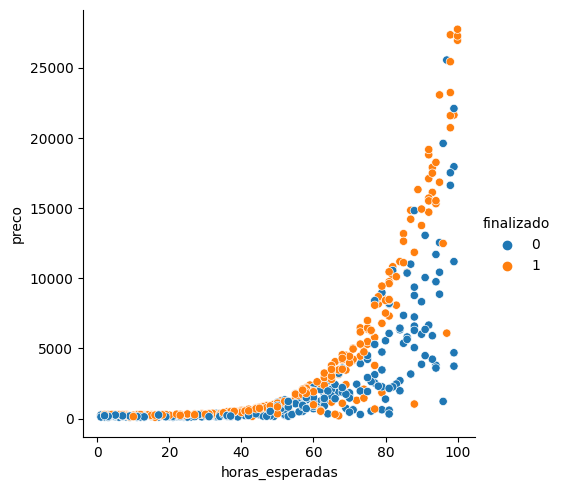

In [24]:
sns.relplot(x="horas_esperadas",y="preco",hue=teste_y, data=teste_x)

In [26]:
#colocar cor pixel a pixel pelo 1 e 0
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min,x_max,y_min,y_max)

1 100 101 27738


In [29]:
pixels = 100
eixo_x =np.arange(x_min,x_max,(x_max - x_min)/pixels)
eixo_y =np.arange(y_min,y_max,(y_max - y_min)/pixels)

In [31]:
#aqui tá concateando os eixos para depois aplicar em grafico
xx,yy = np.meshgrid(eixo_x,eixo_y)
pontos = np.c_[xx.ravel(),yy.ravel()]
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [35]:
z = modelo.predict(pontos)
z = z.reshape(xx.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

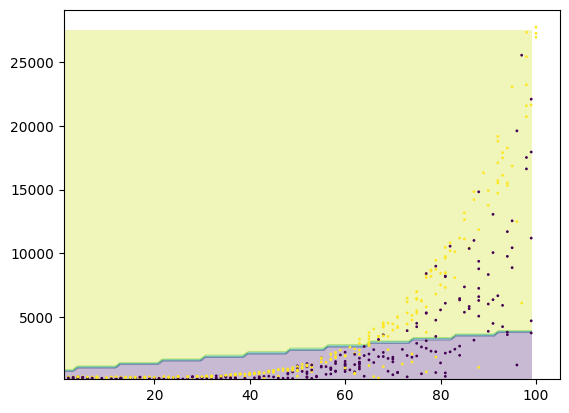

In [38]:
import matplotlib.pyplot as plt

plt.contourf(xx,yy,z,alpha=0.3)
plt.scatter(teste_x.horas_esperadas,teste_x.preco,c=teste_y,s=1)

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

treino_x,teste_x,treino_y,teste_y = train_test_split(x,y,
                                                     random_state = SEED,
                                                     test_size = 0.25,
                                                     stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x),len(teste_x)))

modelo = SVC(gamma='auto')
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict (teste_x)

acuracia = accuracy_score(teste_y,previsoes) *100
print("A acurácia foi de %.2f%%" %acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi de 59.07%


In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

raw_treino_x,raw_teste_x,treino_y,teste_y = train_test_split(x,y,
                                                     random_state = SEED,
                                                     test_size = 0.25,
                                                     stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x),len(teste_x)))

#processo de escalar
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x =scaler.transform(raw_teste_x)

modelo = SVC(gamma='auto')
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict (teste_x)

acuracia = accuracy_score(teste_y,previsoes) *100
print("A acurácia foi de %.2f%%" %acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi de 66.85%


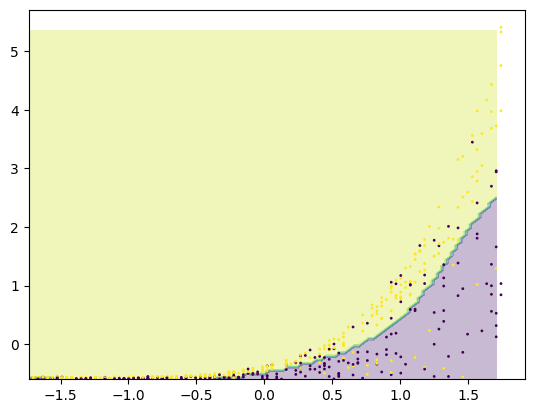

In [57]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x =np.arange(x_min,x_max,(x_max - x_min)/pixels)
eixo_y =np.arange(y_min,y_max,(y_max - y_min)/pixels)

xx,yy = np.meshgrid(eixo_x,eixo_y)
pontos = np.c_[xx.ravel(),yy.ravel()]

z = modelo.predict(pontos)
z = z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx,yy,z,alpha=0.3)
plt.scatter(data_x, data_y, c= teste_y,s=1)
